1. `fin_table...` - это рейтинговые таблицы по сезонам <br> 
2. `train_set...` - это тренировочные выборки по сезонам, в которых есть статистики как команды играют с топами, аутсайдерами и топами + данные из рейтинговой таблицы <br>

In [1]:
import pandas as pd
import warnings
from time import time

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 170)

pd.set_option('display.max_colwidth', -1)

stats = pd.read_excel('all-euro-data-2017-2018.xlsx')
# stats = stats_base[50:] #  пропускаем првые пять туров и начинаем работать с данными 6 и далее туров  
stats.drop('Div', axis = 1, inplace = True)
# stats[:51]

FileNotFoundError: [Errno 2] No such file or directory: 'all-euro-data-2017-2018.xlsx'

# Итоговая таблица после 38 туров за предыдущий сезон

In [59]:
fin_table = pd.read_csv('fin_table17-18.csv')
fin_table.drop('Unnamed: 0', axis = 1, inplace = True)

In [60]:
fin_table

,Team,Points,W,D,L,SG,MG,TS,TST,FC,CC,YC,RC
0,Man City,100,32,4,2,106,27,664,261,344,284,58,2
1,Man United,81,25,6,7,68,28,513,181,404,220,64,1
2,Tottenham,77,23,8,7,74,36,622,217,384,246,49,2
3,Liverpool,75,21,12,5,84,38,640,233,344,230,44,1
4,Chelsea,70,21,7,10,62,38,606,220,363,230,41,4
5,Arsenal,63,19,6,13,74,51,591,233,383,223,57,2
6,Burnley,54,14,12,12,36,39,379,127,350,167,65,0
7,Everton,49,13,10,15,44,58,360,122,459,150,51,3
8,Leicester,47,12,11,15,56,60,422,148,365,203,52,5
9,Crystal Palace,44,11,11,16,45,55,475,151,425,209,71,0


# Объединение выборок за предыдущие сезоны

In [100]:
table14 = pd.read_csv('train_set14-15.csv')
table15 = pd.read_csv('train_set15-16.csv')
table16 = pd.read_csv('train_set16-17.csv')

train_set = table14.append(table15)
train_set = train_set.append(train_set)
train_set.head()

,Unnamed: 0,Team_home,Points_home,W_home,D_home,L_home,SG_home,MG_home,TS_home,TST_home,FC_home,CC_home,YC_home,RC_home,Points_form_top_x,W_home_form_top_x,D_home_form_top_x,L_home_form_top_x,SG_home_form_top_x,MG_home_form_top_x,TS_home_form_top_x,TST_home_form_top_x,FC_home_form_top_x,CC_home_form_top_x,YC_home_form_top_x,RC_home_form_top_x,W_away_form_top_x,D_away_form_top_x,L_away_form_top_x,SG_away_form_top_x,MG_away_form_top_x,TS_away_form_top_x,TST_away_form_top_x,FC_away_form_top_x,CC_away_form_top_x,YC_away_form_top_x,RC_away_form_top_x,Points_form_mid_x,W_home_form_mid_x,D_home_form_mid_x,L_home_form_mid_x,SG_home_form_mid_x,MG_home_form_mid_x,TS_home_form_mid_x,TST_home_form_mid_x,FC_home_form_mid_x,CC_home_form_mid_x,YC_home_form_mid_x,RC_home_form_mid_x,W_away_form_mid_x,D_away_form_mid_x,L_away_form_mid_x,SG_away_form_mid_x,MG_away_form_mid_x,TS_away_form_mid_x,TST_away_form_mid_x,FC_away_form_mid_x,CC_away_form_mid_x,YC_away_form_mid_x,RC_away_form_mid_x,Points_form_out_x,W_home_form_out_x,D_home_form_out_x,L_home_form_out_x,SG_home_form_out_x,MG_home_form_out_x,TS_home_form_out_x,TST_home_form_out_x,FC_home_form_out_x,CC_home_form_out_x,YC_home_form_out_x,RC_home_form_out_x,W_away_form_out_x,D_away_form_out_x,L_away_form_out_x,SG_away_form_out_x,MG_away_form_out_x,TS_away_form_out_x,TST_away_form_out_x,FC_away_form_out_x,CC_away_form_out_x,YC_away_form_out_x,RC_away_form_out_x,Ind,Team_away,Points_away,W_away,D_away,L_away,SG_away,MG_away,TS_away,TST_away,FC_away,CC_away,YC_away,RC_away,Points_form_top_y,W_home_form_top_y,D_home_form_top_y,L_home_form_top_y,SG_home_form_top_y,MG_home_form_top_y,TS_home_form_top_y,TST_home_form_top_y,FC_home_form_top_y,CC_home_form_top_y,YC_home_form_top_y,RC_home_form_top_y,W_away_form_top_y,D_away_form_top_y,L_away_form_top_y,SG_away_form_top_y,MG_away_form_top_y,TS_away_form_top_y,TST_away_form_top_y,FC_away_form_top_y,CC_away_form_top_y,YC_away_form_top_y,RC_away_form_top_y,Points_form_mid_y,W_home_form_mid_y,D_home_form_mid_y,L_home_form_mid_y,SG_home_form_mid_y,MG_home_form_mid_y,TS_home_form_mid_y,TST_home_form_mid_y,FC_home_form_mid_y,CC_home_form_mid_y,YC_home_form_mid_y,RC_home_form_mid_y,W_away_form_mid_y,D_away_form_mid_y,L_away_form_mid_y,SG_away_form_mid_y,MG_away_form_mid_y,TS_away_form_mid_y,TST_away_form_mid_y,FC_away_form_mid_y,CC_away_form_mid_y,YC_away_form_mid_y,RC_away_form_mid_y,Points_form_out_y,W_home_form_out_y,D_home_form_out_y,L_home_form_out_y,SG_home_form_out_y,MG_home_form_out_y,TS_home_form_out_y,TST_home_form_out_y,FC_home_form_out_y,CC_home_form_out_y,YC_home_form_out_y,RC_home_form_out_y,W_away_form_out_y,D_away_form_out_y,L_away_form_out_y,SG_away_form_out_y,MG_away_form_out_y,TS_away_form_out_y,TST_away_form_out_y,FC_away_form_out_y,CC_away_form_out_y,YC_away_form_out_y,RC_away_form_out_y,FTHG,FTAG
0,0,Stoke,54,15,9,14,48,45,501,136,486,192,82,1,16.0,3.0,1.0,2.0,2.0,2.0,14.0,5.0,12.0,5.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,8.0,3.0,12.0,3.0,3.0,0.0,18.0,4.0,1.0,1.0,2.0,1.0,16.0,4.0,14.0,5.0,2.0,0.0,1.0,2.0,3.0,0.0,1.0,10.0,2.0,14.0,5.0,2.0,0.0,20.0,3.0,1.0,3.0,1.0,1.0,18.0,4.0,12.0,7.0,2.0,0.0,2.0,4.0,1.0,1.0,1.0,11.0,4.0,13.0,5.0,3.0,0.0,1,Liverpool,62,18,8,12,52,48,590,194,385,198,66,3,11.0,2.0,1.0,2.0,2.0,2.0,15.0,5.0,10.0,5.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,15.0,5.0,10.0,5.0,2.0,0.0,24.0,5.0,1.0,1.0,2.0,1.0,19.0,6.0,10.0,5.0,1.0,0.0,2.0,2.0,3.0,1.0,2.0,14.0,4.0,10.0,5.0,2.0,0.0,27.0,3.0,3.0,1.0,1.0,1.0,18.0,5.0,10.0,7.0,2.0,0.0,5.0,0.0,2.0,1.0,1.0,12.0,5.0,10.0,4.0,2.0,0.0,6.0,1.0
1,1,Newcastle,39,10,9,19,40,63,467,143,433,222,66,7,9.0,2.0,0.0,4.0,1.0,2.0,12.0,3.0,10.0,5.0,2.0,0.0,1.0,0.0,5.0,1.0,3.0,9.0,3.0,12.0,4.0,2.0,0.0,14.0,2.0,3.0,2.0,2.0,2.0,14.0,4.0,12.0,7.0,1.0,0.0,1.0,2.0,4.0,1.0,2.0,9.0,3.0,11.0,4.0,2.0,0.0,16.0,3.0,2.0,1.0,1.0,1.0,16.0,6.0,12.0,8.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,13.0,4.0,12.0,6.0,1.0,0.0,1,West Ham,47,12,11,15,44,47,485,152,420,241,64,2,8.0,2.0,1.0,3.0,1.0,1.0,15.0,5.0,12.0,7.0,2.0,0.0,0.0,1.0,5.0,0.0,2.0,9.0,2.0,11.0,7.0,2.

# Создание таблицы

In [127]:
teamlist = []
for i in range(20):
    teamlist.append(stats['HomeTeam'][i])
    teamlist.append(stats['AwayTeam'][i])
    
table = pd.DataFrame()    
for k in range(20):
    table.loc[k, 'Team'] = teamlist[k]

In [128]:
def nulling(table):
        table['Points'] = 0
        table['W'] = 0
        table['D'] = 0
        table['L'] = 0
        table['SG'] = 0
        table['MG'] = 0
        table['TS'] = 0
        table['TST'] = 0
        table['FC'] = 0
        table['CC'] = 0
        table['YC'] = 0
        table['RC'] = 0

        return table

table = nulling(table)

In [129]:
def types(table):
    table['Points'] = table['Points'].astype('int')
    table['SG'] = table['SG'].astype('int')
    table['MG'] = table['MG'].astype('int')
    table['TS'] = table['TS'].astype('int')
    table['TST'] = table['TST'].astype('int')
    table['FC'] = table['FC'].astype('int')
    table['CC'] = table['CC'].astype('int')
    table['YC'] = table['YC'].astype('int')
    table['RC'] = table['RC'].astype('int')
    table['L'] = table['L'].astype('int')
    table['D'] = table['D'].astype('int')
    table['W'] = table['W'].astype('int')
    
    return table

table = types(table)

Ниже и есть сама функция, которая принимает матчи тура

In [130]:
def foo(in1,in2):
    
    
    for i in range(in1,in2):
        for j in range(20):
            if table['Team'][j] == stats['HomeTeam'][i]:
                table['SG'][j] += stats['FTHG'][i]
                table['MG'][j] += stats['FTAG'][i]
                table['TS'][j] += stats['HS'][i]
                table['TST'][j] += stats['HST'][i]
                table['FC'][j] += stats['HF'][i]
                table['CC'][j] += stats['HC'][i]
                table['YC'][j] += stats['HY'][i]
                table['RC'][j] += stats['HR'][i]
                if stats['FTHG'][i] > stats['FTAG'][i]:
                    table['Points'][j] += 3
                    table['W'][j] += 1
                elif stats['FTHG'][i] == stats['FTAG'][i]:
                    table['Points'][j] += 1
                    table['D'][j] += 1
                elif stats['FTHG'][i] < stats['FTAG'][i]:
                    table['L'][j] += 1
            elif table['Team'][j] == stats['AwayTeam'][i]:
                table['SG'][j] += stats['FTAG'][i]
                table['MG'][j] += stats['FTHG'][i]
                table['TS'][j] += stats['AS'][i]
                table['TST'][j] += stats['AST'][i]
                table['FC'][j] += stats['AF'][i]
                table['CC'][j] += stats['AC'][i]
                table['YC'][j] += stats['AY'][i]
                table['RC'][j] += stats['AR'][i]
                if stats['FTAG'][i] > stats['FTHG'][i]:
                    table['Points'][j] += 3
                    table['W'][j] += 1
                elif stats['FTAG'][i] == stats['FTHG'][i]:
                    table['Points'][j] += 1
                    table['D'][j] += 1
                elif stats['FTAG'][i] < stats['FTHG'][i]:
                    table['L'][j] += 1
                                        
    n = 1
    while n < len(table['Points']):
        for i in range(len(table['Points'])-1):
            if table['Points'][i] < table['Points'][i + 1]:
                table.iloc[i], table.iloc[i + 1] = table.iloc[i + 1], table.iloc[i]
        n += 1
    m = 1
    while m < len(table['Points']):
        for i in range(len(table['Points']) - 1):
            if table['Points'][i] == table['Points'][i + 1]:
                if table['SG'][i] < table['SG'][i + 1]:
                    table.iloc[i], table.iloc[i + 1] = table.iloc[i + 1], table.iloc[i]
        m += 1
    l = 1
    while l < len(table['Points']):
        for i in range(len(table['Points']) - 1):
            if table['Points'][i] == table['Points'][i + 1]:
                if table['SG'][i] == table['SG'][i + 1]:
                    if table['MG'][i] > table['MG'][i + 1]:
                        table.iloc[i], table.iloc[i + 1] = table.iloc[i + 1], table.iloc[i]
        l += 1 
        
    a = 1
    while a < len(table['Points']):
        for i in range(len(table['Points']) - 1):
            if table['Points'][i] == table['Points'][i + 1]:
                if table['SG'][i] == table['SG'][i + 1]:
                    if table['MG'][i] == table['MG'][i + 1]:
                        if table['W'][i] < table['W'][i + 1]:
                            table.iloc[i], table.iloc[i + 1] = table.iloc[i + 1], table.iloc[i]
        a += 1
    b = 1
    while l < len(table['Points']):
        for i in range(len(table['Points']) - 1):
            if table['Points'][i] == table['Points'][i + 1]:
                if table['SG'][i] == table['SG'][i + 1]:
                    if table['MG'][i] == table['MG'][i + 1]:
                        if table['W'][i] == table['W'][i + 1]:
                            if table['L'][i] > table['D'][i + 1]:
                                table.iloc[i], table.iloc[i + 1] = table.iloc[i + 1], table.iloc[i]
        b += 1    

In [131]:
print('Укажите диапазон туров, результат которых хотите увидеть'+'\n'+'Если хотите увидеть результат одного тура, введите его номер дважды')
tour_1 = int(input('Введите номер первого тура: '))
tour_2 = int(input('Введите номер второго тура: '))
# time_1 = time()
nulling(table)
types(table)
in1 = tour_1 * 10 - 10
while in1 <= tour_2 * 10 - 10:
    in2 = in1 + 10
    foo(in1,in2)
    in1 += 10    
# time_2 = time() - time_1
# time_2

Укажите диапазон туров, результат которых хотите увидеть
Если хотите увидеть результат одного тура, введите его номер дважды
Введите номер первого тура: 1
Введите номер второго тура: 38


In [82]:
print('Таблица по результатам с ' + str(tour_1) + ' по ' + str(tour_2) + ' туры')
#table.index = [i for i in range(1,21)]
table

Таблица по результатам с 1 по 1 туры


,Team,Points,W,D,L,SG,MG,TS,TST,FC,CC,YC,RC
0,Chelsea,3,1,0,0,3,1,11,3,7,3,1,0
1,Man City,3,1,0,0,2,0,13,5,11,3,5,0
2,Arsenal,3,1,0,0,2,1,14,6,13,9,2,0
3,Swansea,3,1,0,0,2,1,5,4,20,0,4,0
4,Liverpool,3,1,0,0,2,1,12,5,8,2,1,0
5,Hull,3,1,0,0,1,0,11,4,10,9,2,0
6,Aston Villa,3,1,0,0,1,0,7,2,9,8,3,0
7,Tottenham,3,1,0,0,1,0,10,4,10,5,0,1
8,Leicester,1,0,1,0,2,2,11,3,16,3,1,0
9,Everton,1,0,1,0,2,2,13,3,10,6,1,0


In [47]:
table = fin_table

W -> Won Matches <br>
D -> Drawed Matches <br>
L -> Lost Matches <br>
SG -> Scored Goals <br>
MG -> Missed Goals <br>
TS -> Team Shots <br>
TST -> Team Shots on Target <br>
FC -> Fouls Committed <br>
CC -> Corners Committed <br>
YC -> Yellow Cards <br>
RC -> Red Cards <br>

_________________________________________

# Функция для статистики против топов, мидлов, аутсайдеров

In [48]:
def statistics(fin_table, chosen_team,d1,d2):
    col_m = list(map(lambda x: str(x), fin_table.columns[:2]))
    col_h = list(map(lambda x: str(x) + '_home_form', fin_table.columns[2:]))
    col_a = list(map(lambda x: str(x) + '_away_form', fin_table.columns[2:]))
    columns = col_m + col_h + col_a
    average_table = pd.DataFrame(columns = columns)
    average_table.loc[0, 'Team'] = chosen_team
    for n in average_table.columns[1:]:
        average_table.loc[0, n] = 0
    lanes_h = []
    lanes_a = []
    for i in range(len(stats)):
        for j in range(d1,d2):
            if chosen_team == stats['HomeTeam'][i]:
                if fin_table['Team'][j] == stats['AwayTeam'][i]:
                    lanes_h.append(i)
            elif chosen_team == stats['AwayTeam'][i]:
                if fin_table['Team'][j] == stats['HomeTeam'][i]:
                    lanes_a.append(i)

    for m in range(len(lanes_h)):
        average_table['SG_home_form'][0] += stats['FTHG'][lanes_h[m]]
        average_table['MG_home_form'][0] += stats['FTAG'][lanes_h[m]]
        average_table['TS_home_form'][0] += stats['HS'][lanes_h[m]]
        average_table['TST_home_form'][0] += stats['HST'][lanes_h[m]]
        average_table['FC_home_form'][0] += stats['HF'][lanes_h[m]]
        average_table['CC_home_form'][0] += stats['HC'][lanes_h[m]]
        average_table['YC_home_form'][0] += stats['HY'][lanes_h[m]]
        average_table['RC_home_form'][0] += stats['HR'][lanes_h[m]]
        if stats['FTHG'][lanes_h[m]] > stats['FTAG'][lanes_h[m]]:
            average_table['W_home_form'][0] += 1
        elif stats['FTHG'][lanes_h[m]] == stats['FTAG'][lanes_h[m]]: 
            average_table['D_home_form'][0] += 1
        elif stats['FTHG'][lanes_h[m]] < stats['FTAG'][lanes_h[m]]:
            average_table['L_home_form'][0] += 1


    for m in range(len(lanes_a)):
        average_table['SG_away_form'][0] += stats['FTAG'][lanes_a[m]]
        average_table['MG_away_form'][0] += stats['FTHG'][lanes_a[m]]
        average_table['TS_away_form'][0] += stats['AS'][lanes_a[m]]
        average_table['TST_away_form'][0] += stats['AST'][lanes_a[m]]
        average_table['FC_away_form'][0] += stats['AF'][lanes_a[m]]
        average_table['CC_away_form'][0] += stats['AC'][lanes_a[m]]
        average_table['YC_away_form'][0] += stats['AY'][lanes_a[m]]
        average_table['RC_away_form'][0] += stats['AR'][lanes_a[m]]
        if stats['FTAG'][lanes_a[m]] > stats['FTHG'][lanes_a[m]]:
            average_table['W_away_form'][0] += 1
        elif stats['FTAG'][lanes_a[m]] == stats['FTHG'][lanes_a[m]]: 
            average_table['D_away_form'][0] += 1
        elif stats['FTAG'][lanes_a[m]] < stats['FTHG'][lanes_a[m]]:
            average_table['L_away_form'][0] += 1

    for i in average_table.columns[5:13]:
        average_table[i][0] = round(average_table[i][0] / len(lanes_h))
    for m in average_table.columns[16:]:
        average_table[m][0] = round(average_table[m][0] / len(lanes_a))
    average_table['Points'][0] = (average_table['W_home_form'][0] + average_table['W_away_form'][0]) * 3 + average_table['D_home_form'][0] + average_table['D_away_form'][0] 
    
    average_table = average_table.rename(columns = {'Points': 'Points_form'})
    
    return average_table

In [35]:
chosen_team = input('Введите название команды, статистику которой хотите увидеть: ')
print('Введите диапазон таблицы, по которому хотите увидеть статистику команды, то есть 0-6, 6-13 или 13-20')
d1 = int(input('Введите первое число в диапазоне таблицы: '))
d2 = int(input('Введите второе число в диапазоне таблицы: '))
statistics(fin_table, chosen_team,d1,d2)

Введите название команды, статистику которой хотите увидеть: Arsenal
Введите диапазон таблицы, по которому хотите увидеть статистику команды, то есть 0-6, 6-13 или 13-20
Введите первое число в диапазоне таблицы: 0
Введите второе число в диапазоне таблицы: 6


,Team,Points_form,W_home_form,D_home_form,L_home_form,SG_home_form,MG_home_form,TS_home_form,TST_home_form,FC_home_form,CC_home_form,YC_home_form,RC_home_form,W_away_form,D_away_form,L_away_form,SG_away_form,MG_away_form,TS_away_form,TST_away_form,FC_away_form,CC_away_form,YC_away_form,RC_away_form
0,Arsenal,16,3,2,0,2,1,15,6,9,8,1,0,1,2,2,2,3,12,5,11,3,1,0


# Создание выборки

In [49]:
def get_form_team(home_team, away_team):
    
    top_teams_home = statistics(fin_table, home_team, 0, 6)
    top_teams_home.columns = list(map(lambda x: str(x) + '_top' if x != 'Team' else 'Team', top_teams_home.columns))
    middle_teams_home = statistics(fin_table, home_team, 6, 13)
    middle_teams_home.columns = list(map(lambda x: str(x) + '_mid' if x != 'Team' else 'Team', middle_teams_home.columns))
    out_teams_home = statistics(fin_table, home_team, 13, 20)
    out_teams_home.columns = list(map(lambda x: str(x) + '_out' if x != 'Team' else 'Team', out_teams_home.columns))
    
    home_stat_df = pd.merge(top_teams_home, middle_teams_home, how='right')
    home_stat_df = pd.merge(home_stat_df, out_teams_home, how='right')
    
    home_stat_df = home_stat_df.rename(columns = {'Team': 'Team_home'})
    
    
    top_teams_away = statistics(fin_table, away_team, 0, 6)
    top_teams_away.columns = list(map(lambda x: str(x) + '_top' if x != 'Team' else 'Team', top_teams_away.columns))
    middle_teams_away = statistics(fin_table, away_team, 6, 13)
    middle_teams_away.columns = list(map(lambda x: str(x) + '_mid' if x != 'Team' else 'Team', middle_teams_away.columns))
    out_teams_away = statistics(fin_table, away_team, 13, 20)
    out_teams_away.columns = list(map(lambda x: str(x) + '_out' if x != 'Team' else 'Team', out_teams_away.columns))
    
    away_stat_df = pd.merge(top_teams_away, middle_teams_away, how='right')
    away_stat_df = pd.merge(away_stat_df, out_teams_away, how='right')
    
    away_stat_df = away_stat_df.rename(columns = {'Team': 'Team_away'})
    
    
    return home_stat_df, away_stat_df
    
    

Эта функция возвращает один датафрейм, в которой текущая статистика двух команд, а также их форма (вся форма)

In [50]:
def get_dataset(data, home_team, away_team):

    column_h = list(map(lambda x: str(x) + '_home', table.columns))
    column_a = list(map(lambda x: str(x) + '_away', table.columns))
    cols = column_h + column_a
    
    h_team = data[data['Team'] == home_team]
    a_team = data[data['Team'] == away_team]
    
    h_team.columns = cols[:13]
    a_team.columns = cols[13:]

    form_home, form_away = get_form_team(home_team, away_team)
    h_team = pd.merge(h_team, form_home, how='right')
    a_team = pd.merge(a_team, form_away, how='right')
    
    h_team['Ind'] = 1
    a_team['Ind'] = 1

    cols = a_team.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    a_team = a_team[cols]
    
    dataset = pd.merge(h_team, a_team, on='Ind')

    return dataset


Сделаем табличку без лишних колонок, чтобы с помощью нее дополнять нашу обучающую выборку

In [51]:
edited_stats = stats.drop((['Date', 'AwayTeam', 'Referee', 'HTR', 'FTR']), axis=1)
edited_stats = edited_stats.rename(columns = {'HomeTeam': 'Team_home'})

Эта функция создаст один общий сет, со статистикой по матчам за определенное кол-во туров. Потом оттуда выбирем один признак для предсказания 

In [52]:
def create_baseline_trainset(standings, tours):
    strings = tours * 10
    
    cols = ['Team_home', 'Points_home', 'SG_home', 'MG_home', 'TS_home', 'TST_home', 'FC_home', 'CC_home',
            'YC_home', 'RC_home', 'Team_away', 'Points_away', 'SG_away', 'MG_away', 'TS_away', 'TST_away',
            'FC_away', 'CC_away', 'YC_away', 'RC_away']
    
    df = pd.DataFrame(columns=cols)
    
    for i in range(strings):
        
        h_team = stats.iloc()[i]['HomeTeam']
        a_team = stats.iloc()[i]['AwayTeam']
        
        addition_stats = edited_stats.loc()[i].to_frame().T
        
        data = get_dataset(standings, h_team, a_team)
    
        new_df = pd.merge(data, addition_stats, how='right')
        df = pd.merge(new_df, df, how='outer')        
        
    cols = df.columns[:167]
    t_set = df[cols]
        
    return t_set
        
        
        
        
        
        

In [53]:
train_set = create_baseline_trainset(table, 38)

# Делаем таблицу для предсказания Total >/< 2.5

In [108]:
pd.set_option('display.max_columns', 170)

t_set = train_set

t_set.head()


,Unnamed: 0,Team_home,Points_home,W_home,D_home,L_home,SG_home,MG_home,TS_home,TST_home,FC_home,CC_home,YC_home,RC_home,Points_form_top_x,W_home_form_top_x,D_home_form_top_x,L_home_form_top_x,SG_home_form_top_x,MG_home_form_top_x,TS_home_form_top_x,TST_home_form_top_x,FC_home_form_top_x,CC_home_form_top_x,YC_home_form_top_x,RC_home_form_top_x,W_away_form_top_x,D_away_form_top_x,L_away_form_top_x,SG_away_form_top_x,MG_away_form_top_x,TS_away_form_top_x,TST_away_form_top_x,FC_away_form_top_x,CC_away_form_top_x,YC_away_form_top_x,RC_away_form_top_x,Points_form_mid_x,W_home_form_mid_x,D_home_form_mid_x,L_home_form_mid_x,SG_home_form_mid_x,MG_home_form_mid_x,TS_home_form_mid_x,TST_home_form_mid_x,FC_home_form_mid_x,CC_home_form_mid_x,YC_home_form_mid_x,RC_home_form_mid_x,W_away_form_mid_x,D_away_form_mid_x,L_away_form_mid_x,SG_away_form_mid_x,MG_away_form_mid_x,TS_away_form_mid_x,TST_away_form_mid_x,FC_away_form_mid_x,CC_away_form_mid_x,YC_away_form_mid_x,RC_away_form_mid_x,Points_form_out_x,W_home_form_out_x,D_home_form_out_x,L_home_form_out_x,SG_home_form_out_x,MG_home_form_out_x,TS_home_form_out_x,TST_home_form_out_x,FC_home_form_out_x,CC_home_form_out_x,YC_home_form_out_x,RC_home_form_out_x,W_away_form_out_x,D_away_form_out_x,L_away_form_out_x,SG_away_form_out_x,MG_away_form_out_x,TS_away_form_out_x,TST_away_form_out_x,FC_away_form_out_x,CC_away_form_out_x,YC_away_form_out_x,RC_away_form_out_x,Ind,Team_away,Points_away,W_away,D_away,L_away,SG_away,MG_away,TS_away,TST_away,FC_away,CC_away,YC_away,RC_away,Points_form_top_y,W_home_form_top_y,D_home_form_top_y,L_home_form_top_y,SG_home_form_top_y,MG_home_form_top_y,TS_home_form_top_y,TST_home_form_top_y,FC_home_form_top_y,CC_home_form_top_y,YC_home_form_top_y,RC_home_form_top_y,W_away_form_top_y,D_away_form_top_y,L_away_form_top_y,SG_away_form_top_y,MG_away_form_top_y,TS_away_form_top_y,TST_away_form_top_y,FC_away_form_top_y,CC_away_form_top_y,YC_away_form_top_y,RC_away_form_top_y,Points_form_mid_y,W_home_form_mid_y,D_home_form_mid_y,L_home_form_mid_y,SG_home_form_mid_y,MG_home_form_mid_y,TS_home_form_mid_y,TST_home_form_mid_y,FC_home_form_mid_y,CC_home_form_mid_y,YC_home_form_mid_y,RC_home_form_mid_y,W_away_form_mid_y,D_away_form_mid_y,L_away_form_mid_y,SG_away_form_mid_y,MG_away_form_mid_y,TS_away_form_mid_y,TST_away_form_mid_y,FC_away_form_mid_y,CC_away_form_mid_y,YC_away_form_mid_y,RC_away_form_mid_y,Points_form_out_y,W_home_form_out_y,D_home_form_out_y,L_home_form_out_y,SG_home_form_out_y,MG_home_form_out_y,TS_home_form_out_y,TST_home_form_out_y,FC_home_form_out_y,CC_home_form_out_y,YC_home_form_out_y,RC_home_form_out_y,W_away_form_out_y,D_away_form_out_y,L_away_form_out_y,SG_away_form_out_y,MG_away_form_out_y,TS_away_form_out_y,TST_away_form_out_y,FC_away_form_out_y,CC_away_form_out_y,YC_away_form_out_y,RC_away_form_out_y,FTHG,FTAG
0,0,Stoke,54,15,9,14,48,45,501,136,486,192,82,1,16.0,3.0,1.0,2.0,2.0,2.0,14.0,5.0,12.0,5.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,8.0,3.0,12.0,3.0,3.0,0.0,18.0,4.0,1.0,1.0,2.0,1.0,16.0,4.0,14.0,5.0,2.0,0.0,1.0,2.0,3.0,0.0,1.0,10.0,2.0,14.0,5.0,2.0,0.0,20.0,3.0,1.0,3.0,1.0,1.0,18.0,4.0,12.0,7.0,2.0,0.0,2.0,4.0,1.0,1.0,1.0,11.0,4.0,13.0,5.0,3.0,0.0,1,Liverpool,62,18,8,12,52,48,590,194,385,198,66,3,11.0,2.0,1.0,2.0,2.0,2.0,15.0,5.0,10.0,5.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,15.0,5.0,10.0,5.0,2.0,0.0,24.0,5.0,1.0,1.0,2.0,1.0,19.0,6.0,10.0,5.0,1.0,0.0,2.0,2.0,3.0,1.0,2.0,14.0,4.0,10.0,5.0,2.0,0.0,27.0,3.0,3.0,1.0,1.0,1.0,18.0,5.0,10.0,7.0,2.0,0.0,5.0,0.0,2.0,1.0,1.0,12.0,5.0,10.0,4.0,2.0,0.0,6.0,1.0
1,1,Newcastle,39,10,9,19,40,63,467,143,433,222,66,7,9.0,2.0,0.0,4.0,1.0,2.0,12.0,3.0,10.0,5.0,2.0,0.0,1.0,0.0,5.0,1.0,3.0,9.0,3.0,12.0,4.0,2.0,0.0,14.0,2.0,3.0,2.0,2.0,2.0,14.0,4.0,12.0,7.0,1.0,0.0,1.0,2.0,4.0,1.0,2.0,9.0,3.0,11.0,4.0,2.0,0.0,16.0,3.0,2.0,1.0,1.0,1.0,16.0,6.0,12.0,8.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,13.0,4.0,12.0,6.0,1.0,0.0,1,West Ham,47,12,11,15,44,47,485,152,420,241,64,2,8.0,2.0,1.0,3.0,1.0,1.0,15.0,5.0,12.0,7.0,2.0,0.0,0.0,1.0,5.0,0.0,2.0,9.0,2.0,11.0,7.0,2.

Уберем нижеперечисленные признаки из за высокой корреляции

In [109]:
t_set = t_set.drop((['SG_home', 'MG_home',
                     'SG_away', 'MG_away', 'TST_home', 'TST_away', 'Unnamed: 0']), axis=1)
t_set['Total>2.5'] = pd.Series()


Предсказываем сумму `FTHG` и `FTAG`, то есть если `сумма (total)` больше или равен 2, то `1`, в противном случае `0`

In [110]:
t_set['Total>2.5'][(t_set['FTHG'] + t_set['FTAG']) > 2] = 1
t_set['Total>2.5'][(t_set['FTHG'] + t_set['FTAG']) <= 2] = 0

X = t_set.drop((['FTHG', 'FTAG', 'Total>2.5', 'Team_home', 'Team_away']), axis=1)
y = t_set['Total>2.5']

In [111]:
X.shape, y.shape

((1520, 157), (1520,))

# Анализ

Поделить наши данные на тестовую и обучающую выборку

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Ну и поимпортим чуть чуть)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

# KNN

In [115]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.6359649122807017
Recall:  0.5991379310344828
Precision:  0.6556603773584906


In [0]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

С помощью фун-ии `GridSearchCV` мы сможем подобрать некоторые параметры, остальные будем подбирать в ручную

In [116]:
params = {'n_neighbors': range(1,30), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': range(1,30)}
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [117]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=1, metric='minkowski', weights='uniform')
scores = cross_val_score(model, X_train, y_train, cv=5,
                        scoring='accuracy')
print('Average value on cross-validation without right parametrs:', scores)

model.fit(X_train, y_train)
model.score(X_test, y_test)



Average value on cross-validation without right parametrs: [0.79439252 0.79812207 0.82159624 0.83490566 0.77830189]


0.8201754385964912

Попробуем подобрать метрику расстояния для модели, а потом подберем оптимальное значение `p`

In [118]:
metrics = ['minkowski', 'wminkowski', 'manhattan', 'chebyshev']

for metric in metrics:
    try:
        model = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=13, metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(metric)
        print('Accuracy: ', accuracy_score(y_test, y_pred))
        print('Recall: ', recall_score(y_test, y_pred))
        print('Precision: ', precision_score(y_test, y_pred))
    except TypeError:
        print('Problems')

minkowski
Accuracy:  0.5723684210526315
Recall:  0.5775862068965517
Precision:  0.5800865800865801
Problems
manhattan
Accuracy:  0.5635964912280702
Recall:  0.5775862068965517
Precision:  0.5702127659574469
chebyshev
Accuracy:  0.5855263157894737
Recall:  0.5387931034482759
Precision:  0.6038647342995169


Теперь подберем `p` и отрисуем график

In [119]:
p = [i for i in range(100)]

acc_p = []
recall_p = []
for i in p:
    try:
        model = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=13, metric='manhattan', p=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_p.append(accuracy_score(y_test, y_pred))
        recall_p.append(recall_score(y_test, y_pred))
    except TypeError:
        print('Problems')

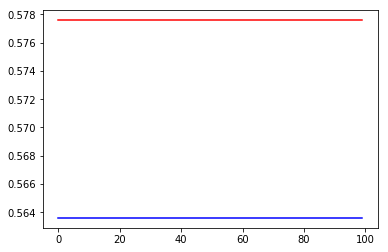

In [120]:
plt.plot(p, acc_p, c='blue') # accuracy
plt.plot(p, recall_p, c='red') # precision

Из графика можно увидеть, что значение параметра `p` не влияет на точность нашей модели

`Функция для кросс валидации`. То есть на выход мы получаем натренированную на кросс валидации модель, среднюю точность (accuracy) модели и саму модель

In [121]:
def cross_validation(X, y, cv, model):
    
    acc_score = []
    for i in range(cv):
        X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=123, test_size=0.2)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        res = accuracy_score(y_test, y_pred)
        acc_score.append(res)
        
    acc_score = sum(acc_score) / cv
    return {'model': model, 'MeanScore': acc_score} 
        
    
        

In [123]:
m = KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=1, metric='minkowski', weights='uniform')
info = cross_validation(X, y, 5, m)
print('Mean accuracy of model:', info['MeanScore'])
print('Our model:', info['model'])


Mean accuracy of model: 0.9210526315789472
Our model: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [129]:
y_pred = info['model'].predict(X_test)

print('Accuracy after croos-validation: ', accuracy_score(y_test, y_pred))
print('Recall after croos-validation: ', recall_score(y_test, y_pred))
print('Precision after croos-validation: ', accuracy_score(y_test, y_pred))
print('F1-metric after croos-validation: ', f1_score(y_test, y_pred))

Accuracy after croos-validation:  0.9758771929824561
Recall after croos-validation:  0.9655172413793104
Precision after croos-validation:  0.9758771929824561
F1-metric after croos-validation:  0.9760348583877996


# Random Forest Classifier

In [0]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))


Accuracy:  0.543859649122807
Recall:  0.40350877192982454
Precision:  0.5609756097560976


In [0]:
params = {'n_estimators': range(1,100), 'criterion': ['gini', 'entropy'],
         'max_depth': range(1,100), 'min_samples_split': range(2,50)}
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)
clf.best_estimator_

KeyboardInterrupt: 